In [46]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
pd.options.display.max_columns = None

## Various Correlations
#### box office with audience & critic percentages

In [16]:
wikidata = pd.read_json('movies/data/wikidata-movies2.json.gz', orient='records', lines=True)
tomato = pd.read_json('movies/data/rotten-tomatoes.json.gz', orient='records', lines=True)
r = pd.read_json('movies/data/omdb-data.json.gz', orient='records', lines=True)

In [22]:
wiki_tomato = wikidata.merge(tomato, on='imdb_id', how="inner")

In [28]:
wiki_tomato = wiki_tomato[pd.notnull(wiki_tomato['nbox'])]
wiki_tomato = wiki_tomato[pd.notnull(wiki_tomato['critic_percent'])]
wiki_tomato = wiki_tomato[pd.notnull(wiki_tomato['audience_percent'])]

In [69]:
def millions(x, pos):
    if x >= 1000000000:
        return '%1.1fB' % (x * 1e-9)
    else:
        return '%1.1fM' % (x * 1e-6)

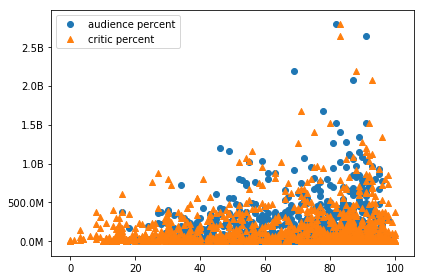

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
ax.scatter(wiki_tomato['audience_percent'], wiki_tomato['nbox'], marker='o', label='audience percent')
ax.scatter(wiki_tomato['critic_percent'], wiki_tomato['nbox'], marker='^', label='critic percent')
plt.legend(loc='upper left')
plt.tight_layout()

In [73]:
wiki_tomato['audience_percent'].corr(wiki_tomato['nbox'])
# 0.17 correlation - fairly weak

0.17918037117450256

In [78]:
wiki_tomato

,based_on,cast_member,country_of_origin,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,main_subject,metacritic_id,nbox,ncost,original_language,publication_date,rotten_tomatoes_id_x,series,wikidata_id,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,rotten_tomatoes_id_y
45,Q211927,"[Q4538670, Q4506194, Q4137597, Q4142346, Q4102...",Q159,[Q2622675],Hard to Be a God (2013 film),NaN,"[Q471839, Q1257444]",tt2328813,History of the Arkanar Massacre,NaN,NaN,movie/hard-to-be-a-god,1400000.0,NaN,Q7737,2013-11-13,m/hard_to_be_a_god_2015,NaN,Q4204793,3.6,65.0,2127.0,9.1,94.0,m/hard_to_be_a_god_2015
109,NaN,"[Q175535, Q23844, Q80966, Q29250, Q215072, Q18...",Q183,[Q23844],The Monuments Men,"[Q64, Q183]","[Q369747, Q130232]",tt2177771,Monuments Men,1.0,[Q362],movie/the-monuments-men,154984032.0,70000000.0,Q1860,2014-02-07,m/the_monuments_men,NaN,Q4407383,3.1,44.0,72826.0,5.2,30.0,m/the_monuments_men
685,Q2420783,"[Q276525, Q160392, Q26231, Q428819, Q359488, Q...",Q30,"[Q944763, Q522057]",Ant-Man (film),"[Q62, Q23556, Q7464, Q2749189, Q24075247, Q270...","[Q188473, Q471839, Q1535153, Q496523]",tt0478970,Ant-Man,NaN,NaN,movie/ant-man,180202160.0,NaN,Q1860,2015-07-14,m/antman,Q642878,Q5901134,4.0,86.0,164185.0,6.8,82.0,m/antman
841,NaN,"[Q5126010, Q3390414, Q5676024, Q237021]",Q29,[Q51892574],Orbiter 9,NaN,"[Q24925, Q21010853]",tt3469798,Orbiter 9,0.0,NaN,NaN,281319.0,4000000.0,NaN,2017-04-07,m/orbiter_9,NaN,Q42577704,3.1,41.0,60.0,5.5,60.0,m/orbiter_9
1699,Q2944381,"[Q873, Q40523, Q165518, Q201418, Q294583, Q273...",Q30,[Q2465518],August: Osage County (film),NaN,[Q130232],tt1322269,August: Osage County,1.0,"[Q127683, Q906343]",movie/august-osage-county,74200000.0,25000000.0,Q1860,2013-09-09,m/august_osage_county,NaN,Q4055443,3.5,65.0,39033.0,6.4,65.0,m/august_osage_county
1738,Q17014869,"[Q162492, Q37459, Q542571, Q208667, Q705522, Q...",Q408,[Q16730387],The Railway Man (film),"[Q408, Q869, Q23436]","[Q369747, Q130232, Q645928]",tt2058107,The Railway Man,0.0,"[Q184425, Q362]",movie/the-railway-man,22320892.0,26000000.0,Q1860,2013-01-01,m/the_railway_man,NaN,Q4178880,3.6,68.0,15495.0,6.5,67.0,m/the_railway_man
2802,Q83279,"[Q299282, Q591238, Q4337, Q4488, Q454102, Q415...",Q30,[Q3078869],The SpongeBob Movie: Sponge Out of Water,[Q1428],[Q2143665],tt2279373,The SpongeBob Movie: Sponge Out of Water,1.0,NaN,movie/the-spongebob-movie-sponge-out-of-water,325186048.0,74000000.0,Q1860,2015-01-01,m/spongebob_squarepants_2,NaN,Q7765993,3.3,54.0,51692.0,6.5,80.0,m/spongebob_squarepants_2
2984,NaN,"[Q386349, Q1605965, Q3805579, Q271162, Q463226...",Q30,[Q2071],Eraserhead,[Q99],"[Q130232, Q200092, Q5967378]",tt0074486,Eraserhead,1.0,[Q906343],NaN,7000000.0,100000.0,Q1860,1977-01-01,m/eraserhead,NaN,Q11618,3.9,83.0,57175.0,8.3,91.0,m/eraserhead
2992,Q17017426,"[Q117500, Q1376880, Q11930, Q311169, Q951634, ...",Q30,[Q11930],Dances with Wolves,[Q1558],"[Q130232, Q369747, Q21590660, Q21010853, Q319221]",tt0099348,Dances with Wolves,1.0,NaN,movie/dances-with-wolves,424208832.0,22000000.0,Q1860,1990-11-09,m/dances_with_wolves,NaN,Q20456,3.6,87.0,213360.0,7.5,82.0,m/dances_with_wolves
2995,NaN,"[Q38111, Q211553, Q177311, Q8927, Q173399, Q20...",Q145,[Q25191],Inception,"[Q99, Q387047, Q17, Q90, Q1951, Q7275217, Q126...","[Q496523, Q471839, Q2484376, Q188473, Q319221]",tt1375666,Inception,1.0,"[Q544830, Q4425624]",movie/inception,825532740.0,160000000.0,Q1860,2010-07-08,m/inception,NaN,Q25188,4.2,91.0,568239.0,8.1,86.0,m/inception


#### Cast Member to Box office